In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
)

In [2]:
# Load the dataset
df = pd.read_csv("./datasets/iris.csv")

In [3]:
# Display first few rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Separating features and target variable
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]  # Target (last column)

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

In [14]:
# Creating and training the Naïve Bayes classifier
nb_classifier = GaussianNB().fit(X_train, y_train)
nb_classifier

GaussianNB()

In [15]:
# Making predictions
y_pred = nb_classifier.predict(X_test)
y_pred_proba = nb_classifier.predict_proba(X_test)

In [16]:
y_pred_proba

array([[1.00000000e+000, 2.51954911e-021, 6.21016874e-027],
       [4.67443484e-099, 9.99360612e-001, 6.39388081e-004],
       [9.03397015e-086, 9.99338861e-001, 6.61138528e-004],
       [1.86472016e-185, 1.76549145e-004, 9.99823451e-001],
       [1.79802195e-064, 9.99995451e-001, 4.54861865e-006],
       [3.01480757e-071, 9.99980924e-001, 1.90758195e-005],
       [2.47845767e-236, 1.20767654e-009, 9.99999999e-001],
       [1.00000000e+000, 2.09095516e-018, 4.81370641e-024],
       [1.75190706e-194, 2.19405508e-004, 9.99780594e-001],
       [1.00000000e+000, 1.38710886e-021, 2.33192358e-027],
       [3.15412894e-169, 3.68274629e-004, 9.99631725e-001],
       [4.65511612e-115, 9.40462780e-001, 5.95372199e-002],
       [1.52327720e-127, 9.82476018e-001, 1.75239825e-002],
       [1.00000000e+000, 1.09160054e-021, 3.70842238e-027],
       [1.00000000e+000, 7.90593258e-021, 1.78506365e-026],
       [3.68909096e-279, 7.76341498e-012, 1.00000000e+000],
       [1.00000000e+000, 1.97261845e-023

In [8]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


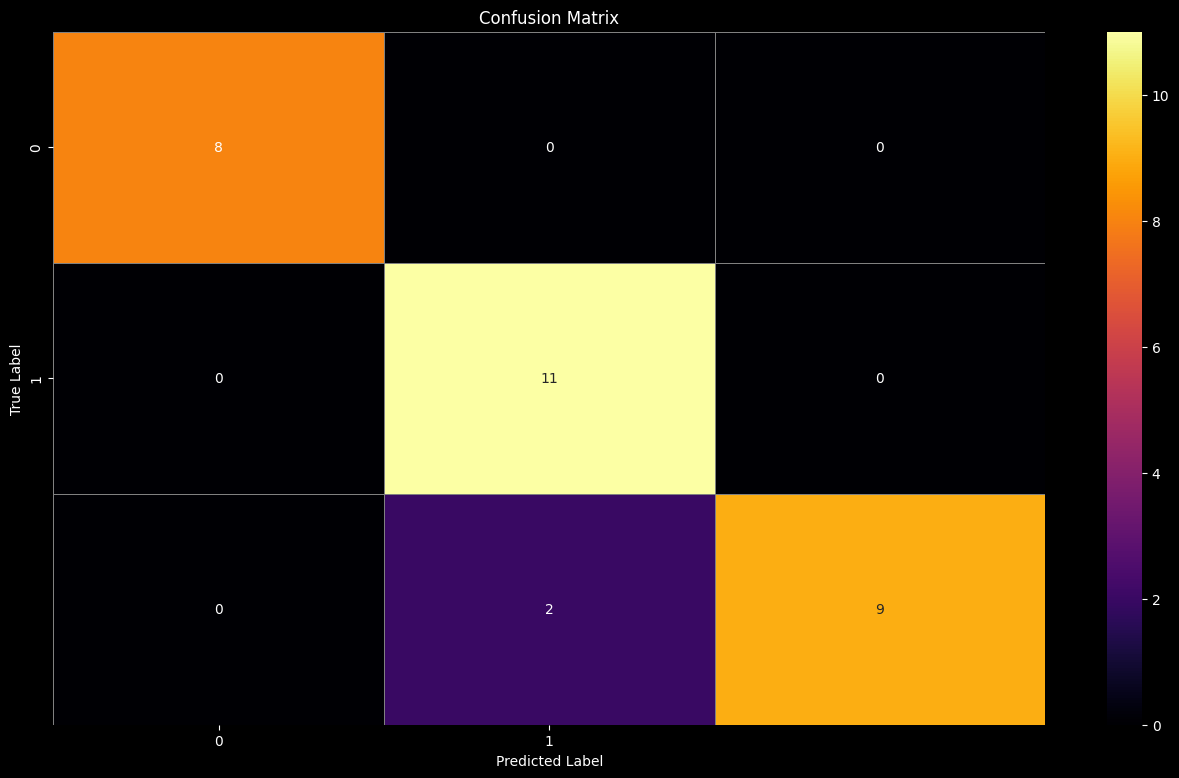

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="inferno",
    xticklabels=[0, 1],
    yticklabels=[0, 1],
    linewidths=0.5,
    linecolor="grey",
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Extracting TP, FP, TN, FN
TP = np.diag(cm)  # True Positives are the diagonal elements
FP = cm.sum(axis=0) - TP  # False Positives
FN = cm.sum(axis=1) - TP  # False Negatives
TN = cm.sum() - (FP + FN + TP)  # True Negatives

In [11]:
print(f"TP -> {TP}\nFP -> {FP}\nFN -> {FN}\nTN -> {TN}")

TP -> [ 8 11  9]
FP -> [0 2 0]
FN -> [0 0 2]
TN -> [22 17 19]


In [12]:
# Compute accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

In [13]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.93
Error Rate: 0.07
Precision: 0.95
Recall: 0.94
